# Varying block size plotting scripts

In [70]:
# Import necessary libraries 
import matplotlib.pyplot as plt
from numpy import percentile

In [71]:
ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"
# data_file = f"{ROOT}/data/May04/t2med/varyp"
data_file = f"{ROOT}/data/May05/t2med-geo/varyd"
Protocols = ["artemis","apollo","optsync"]
F = [4,8,16,32]
N=[ 2*f+1 for f in F]
Blocksize=400
Markers = {
    "artemis": "+",
    "apollo": "o",
    "optsync": "x",
}
Name = {
    "artemis": "Artemis",
    "apollo": "Apollo",
    "optsync": "Opt Sync"
}

In [72]:
data = {}
for p in Protocols:
    data[p] = {}

# Process the given log_file
def process_log_file(log_file:str, log_data={"w":[],"tput":[],"lat":[]}):
    with open(log_file, "r") as f:
        for line in f.readlines():
            if line.count("DP[Window]: ") > 0:
                window = int(line.split("DP[Window]: ")[1].strip())
                log_data["w"].append(window/1000)
            if line.count("DP[Throughput]: ") > 0:
                tput = float(line.split("DP[Throughput]: ")[1].strip())
                log_data["tput"].append(tput/1000)
            if line.count("DP[Latency]: ") > 0:
                lat = float(line.split("DP[Latency]: ")[1].strip())
                log_data["lat"].append(lat)

# Function to add data to the dictionary
def add_data(Protocol:str, f:int, in_data={}):
    # Reset stale data
    if Protocol not in in_data.keys():
        in_data[Protocol] = {}
    # Overwrite whatever stale blocksize data was there, with a new one
    in_data[Protocol][f] = {
        "w": [],
        "tput": [],
        "lat": []
    }
    # Process the file
    log_file = f"{data_file}/{f}-{Protocol}-run.log"
    log_data = process_log_file(log_file, in_data[Protocol][f])

for proto in Protocols:
    for f in F:
        add_data(proto,f,data)

import json 
with open(f"{data_file}/processed.json","w") as f:
    json.dump(data, f, indent=4)
# print(data["synchs"])

In [73]:
W = [10.0,60.0,100.0]
def get_throughputs(proto:str, w:float):
    out = []
    for f in data[proto].keys():
        idx = 0
        for w_new in data[proto][f]["w"]:
            if w_new == w:
                out.append(data[proto][f]["tput"][idx])
            idx += 1
    return out

def get_latencies(proto:str, w:float):
    out = []
    for f in data[proto].keys():
        idx = 0
        for w_new in data[proto][f]["w"]:
            if w_new == w:
                out.append(data[proto][f]["lat"][idx])
            idx += 1
    return out

mod_data = {}
for proto in Protocols:
    mod_data[proto] = {}
    for w in W:
        mod_data[proto][w] = {}
        mod_data[proto][w]["tput"] = []
        mod_data[proto][w]["lat"] = []
        mod_data[proto][w]["tput"].extend(get_throughputs(proto, w))
        mod_data[proto][w]["lat"].extend(get_latencies(proto, w))


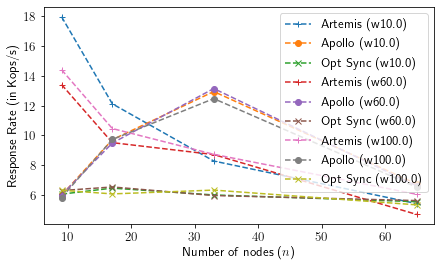

In [74]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(7, 4)
plt.rcParams.update({'font.size': 13})

for w in W:
    for proto in Protocols:
        plt.plot(N,mod_data[proto][w]["tput"], label=f"{Name[proto]} (w{w})", linestyle='--', marker=Markers[proto])

plt.legend()
plt.ylabel("Response Rate (in Kops/s)")
plt.xlabel("Number of nodes ($n$)")
# plt.show()
plt.savefig(f"{ROOT}/Plots/scale/tput-vs-n.pdf", bbox_inches="tight")
# # plt.savefig("", bbox_inches="tight")

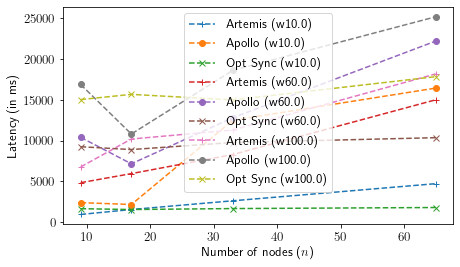

In [75]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(7, 4)
plt.rcParams.update({'font.size': 13})

for w in W:
    for proto in Protocols:
        plt.plot(N,mod_data[proto][w]["lat"], label=f"{Name[proto]} (w{w})", linestyle='--', marker=Markers[proto])

plt.legend()
plt.ylabel("Latency (in ms)")
plt.xlabel("Number of nodes ($n$)")
# plt.show()
plt.savefig(f"{ROOT}/Plots/scale/lat-vs-n.pdf", bbox_inches="tight")
# # plt.savefig("", bbox_inches="tight")

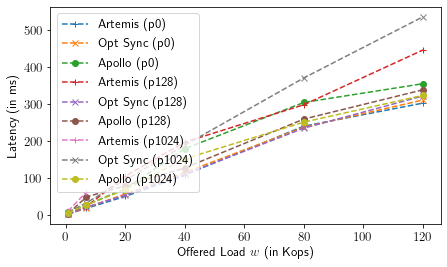

In [17]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(7, 4)
plt.rcParams.update({'font.size': 13})

for p in Payloads:
    for proto in ["artemis","optsync","apollo"]:
         plt.plot(data[proto][p]["w"],data[proto][p]["lat"], label=f"{Name[proto]} (p{p})", linestyle='--', marker=Markers[proto])

plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Latency (in ms)")
# plt.show()
plt.savefig(f"{ROOT}/Plots/parity/tput-vs-w-forp.pdf", bbox_inches="tight")
# plt.savefig("Latency-vs-w-for-diff-b.pdf", bbox_inches="tight")

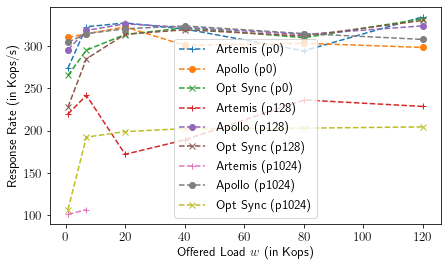

In [18]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(7, 4)
plt.rcParams.update({'font.size': 13})

for p in Payloads:
    for proto in Protocols:
         plt.plot(data[proto][p]["w"],data[proto][p]["tput"], label=f"{Name[proto]} (p{p})", linestyle='--', marker=Markers[proto])

plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Response Rate (in Kops/s)")
# plt.show()
plt.savefig(f"{ROOT}/Plots/parity/lat-vs-w-forp.pdf", bbox_inches="tight")
# plt.savefig("Tput-vs-w-for-diff-b.pdf", bbox_inches="tight")

In [45]:
%%bash
# Export to the overleaf document
cd "/run/media/haxolotl/Backup/GitRoot/libapollo-rust"


0.log
1.log
2.log
benches
Cargo.lock
Cargo.toml
client.log
cli_ip_file
config
consensus
crypto
data
examples
ip_file
logs.txt
Makefile
net
perf.data
perf.data.old
Plots
scripts
src
target
testdata
TODO.md
tools
types
util
